In [161]:
import os, sys
import numpy as np
import nibabel as nb
import pydicom as dcm
import matplotlib.pylab as plt
from scipy import signal
%matplotlib inline

In [162]:
TR=[316,450,1000,2000]
TE=[50,100,150,200]

In [163]:
listVol=["http://www.ci2c.fr/imagesLAS/T1W_multiTR.nii.gz","http://www.ci2c.fr/imagesLAS/T2W_multiTE.nii.gz","mask.nii.gz"]

Téléchargements des volumes

In [ ]:
for url in urls:
    str="wget "+ url
    print(url)
    os.system(str)     #!str
    print(os.path.getsize(url.split('/')[-1]))

Lecture des volumes

In [164]:
T1W = nb.load('T1W_multiTR.nii.gz')
T2W = nb.load('T2W_multiTE.nii.gz')
MASK= nb.load('mask.nii.gz')

Affichier la taille de chaque matrice

In [188]:
print(T1W.header.get_dim_info())

(None, None, None)


In [166]:
T1W_vox=T1W.get_fdata()
T2W_vox=T2W.get_fdata()
MASK_vox=MASK.get_fdata()

Fonction pour visualiser un volume 3D

In [167]:
def display_mri(data, title=None, cmap="gray", vmin=-1, vmax=0.8): 
    vmin=np.min(data)
    vmax=np.max(data)
    fig,axs = plt.subplots(nrows=1, ncols=5, figsize=(20,8))
    for ax in axs:
        ax.set_xticks(())
        ax.set_yticks(())
    if title:
        fig.suptitle(title)
    axs[0].imshow(data[:,:,4], cmap=cmap, vmin=vmin, vmax=vmax)
    axs[1].imshow(data[:,:,8], cmap=cmap, vmin=vmin, vmax=vmax)
    axs[2].imshow(data[:,:,12], cmap=cmap, vmin=vmin, vmax=vmax)
    axs[3].imshow(data[:,:,16], cmap=cmap, vmin=vmin, vmax=vmax)
    axs[4].imshow(data[:,:,20], cmap=cmap, vmin=vmin, vmax=vmax)    
    fig.tight_layout()
    plt.show()

Utiliser la fonction pour visualiser chaque volume 

In [ ]:
display_mri(T2W_vox[:,:,:,1])
display_mri(B1+B2)
display_mri(MASK_vox,cmap='jet')

Utilisation de la matrice [[-1,-1,-1],[0,0,0],[1,1,1]] pour detecter les bords dans le sens vertical...modifier la matrice pour obtenir le sens horizontal....
afficher l'image des bords horizontaux et verticaux

Puis flouter avec la même technique de convolution de matrice

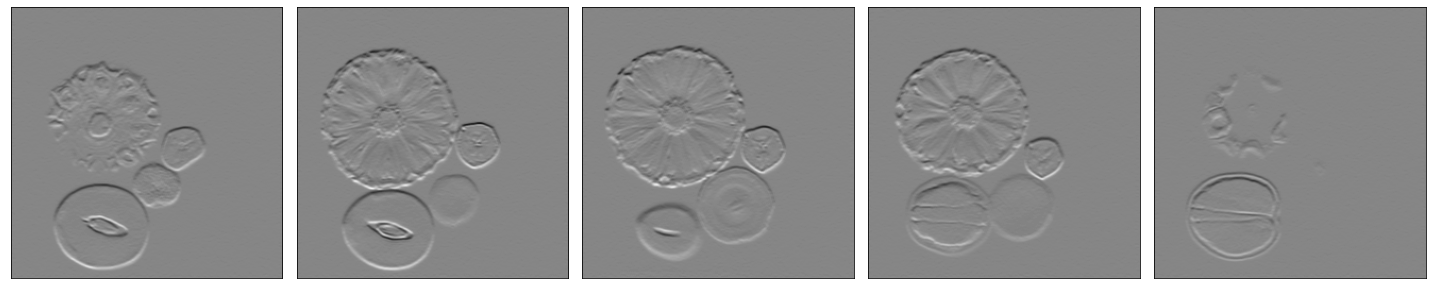

In [175]:
M = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
B1 = np.zeros(T2W_vox.shape[0:3])
for cpt in range(T2W_vox.shape[2]):
    B1[:,:,cpt] = signal.convolve2d(T2W_vox[:,:,cpt,1],M, boundary='fill', mode='same')
display_mri(B1)

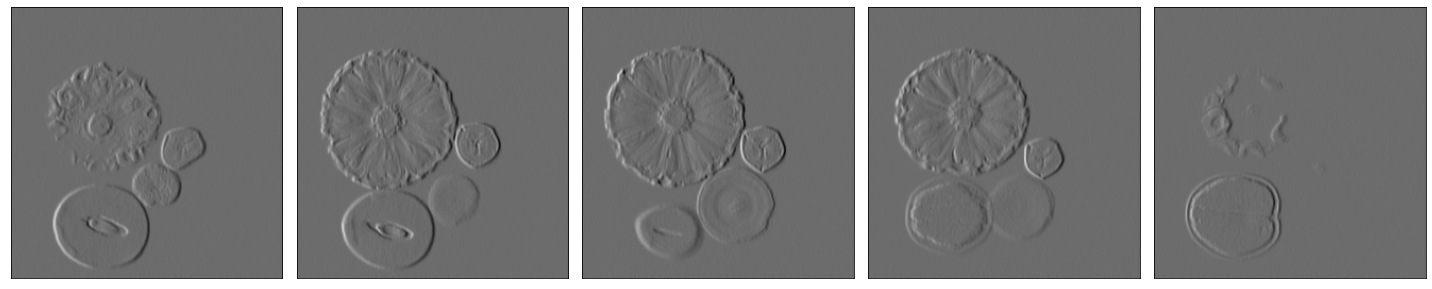

In [176]:
M = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
B2 = np.zeros(T2W_vox.shape[0:3])
for cpt in range(T2W_vox.shape[2]):
    B2[:,:,cpt] = signal.convolve2d(T2W_vox[:,:,cpt,1],M, boundary='fill', mode='same')
display_mri(B2)

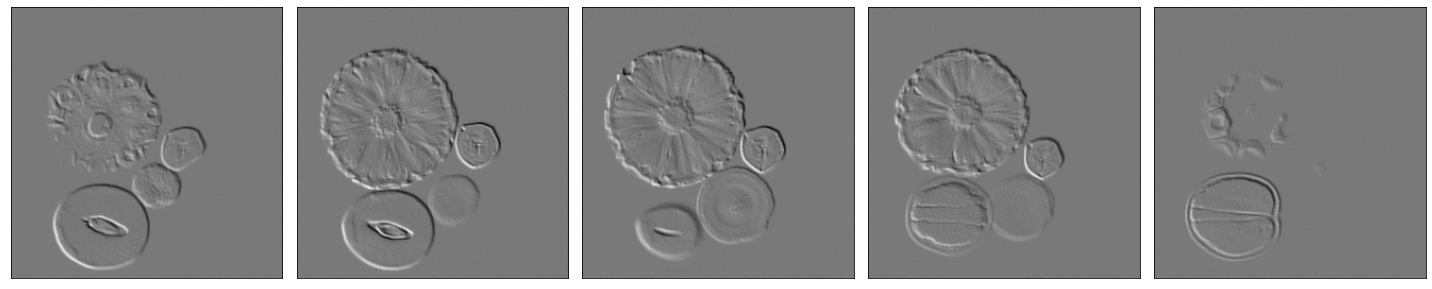

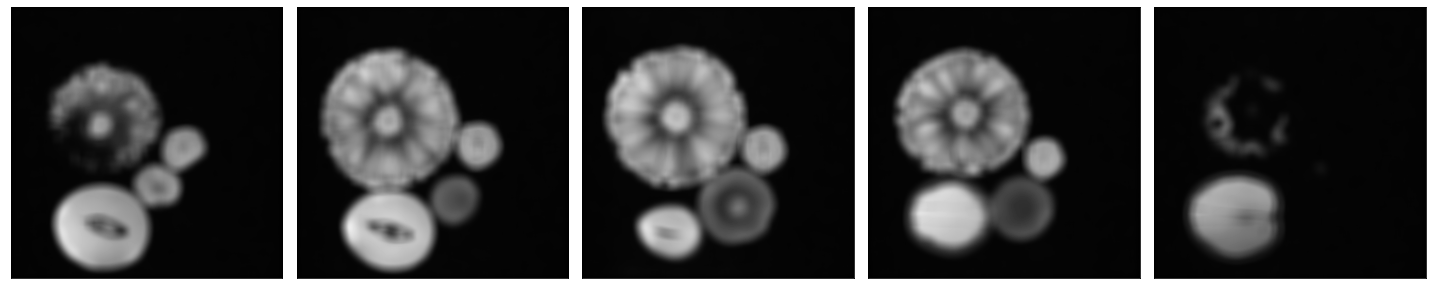

In [170]:
M = np.ones((10,10))
B = np.zeros(T2W_vox.shape[0:3])
for cpt in range(T2W_vox.shape[2]):
    B[:,:,cpt] = signal.convolve2d(T2W_vox[:,:,cpt,1],M, boundary='fill', mode='same')
display_mri(B)

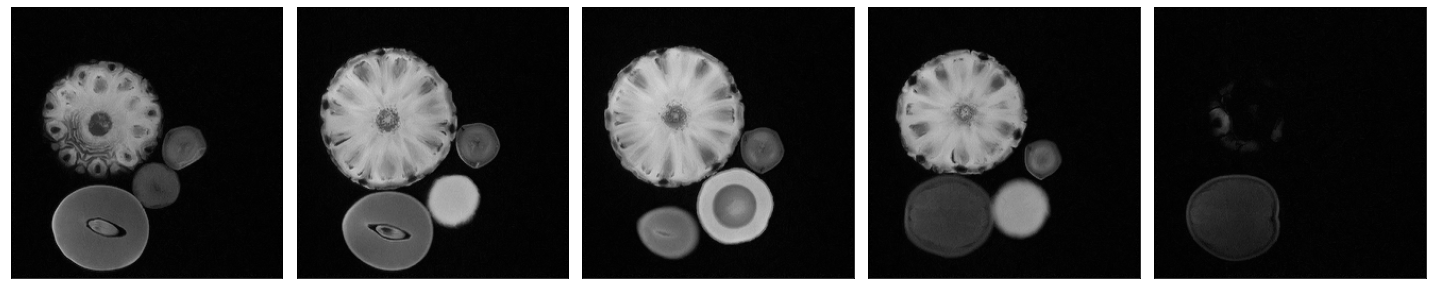

In [71]:
display_mri(T1W_vox[:,:,:,1])

In [73]:
print(img.header)

NameError: name 'img' is not defined

In [74]:
dcm.dcmread('MR.1.2.392.200036.9123.100.12.11.14250.20190101053811.4.1.dcm')

(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'OTHER']
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.392.200036.9123.100.12.11.14250.20190101053811.4.1
(0008, 0020) Study Date                          DA: '20190101'
(0008, 0021) Series Date                         DA: '20190101'
(0008, 0022) Acquisition Date                    DA: '20190101'
(0008, 0023) Content Date                        DA: '20190101'
(0008, 0030) Study Time                          TM: '051308'
(0008, 0031) Series Time                         TM: '052921.54'
(0008, 0032) Acquisition Time                    TM: '053030'
(0008, 0033) Content Time                        TM: '053810.48'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'MR'
(0008, 0070) Manufacturer                        LO: 'HITACHI MEDICAL CORPORATION'
(0008, 0080) Institution Name

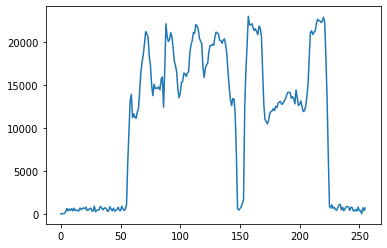

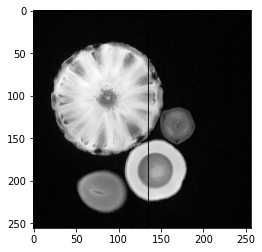

In [76]:
plt.plot(T1W_vox[:,135,12,1]) 
plt.show()
TMP=np.copy(T1W_vox[:,:,12,1])
TMP[:,135]=10
plt.imshow(TMP,cmap="gray")
plt.show()

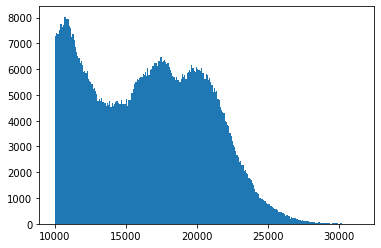

In [145]:
plt.hist(T1W_vox.ravel(),bins = 256, range = [10000,np.max(T1W_vox)]) 
plt.show()

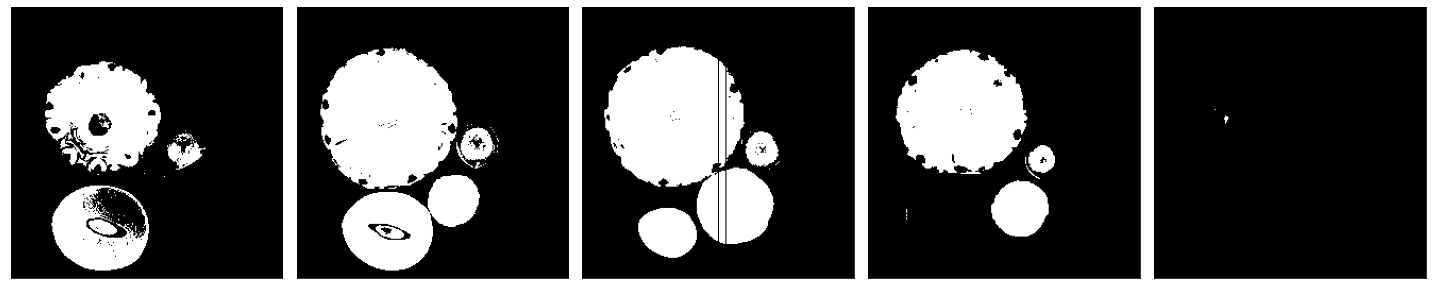

In [57]:
from skimage.filters import threshold_otsu

# Obtain the optimal threshold value with otsu
thresh = threshold_otsu(T1W_vox[:,:,:,1])

# Apply thresholding to the image
binary = T1W_vox[:,:,:,1] > thresh

# Show the image
display_mri(binary)

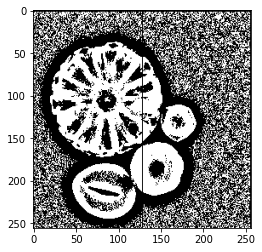

In [61]:
from skimage.filters import threshold_local

# Set the block size to 35
block_size = 35

# Obtain the optimal local thresholding
local_thresh = threshold_local(T1W_vox[:,:,10,1], block_size, offset=0.1)
# Apply thresholding to the image
binary = T1W_vox[:,:,10,1] > local_thresh

# Show the image
plt.imshow(binary,cmap='gray')
plt.show()

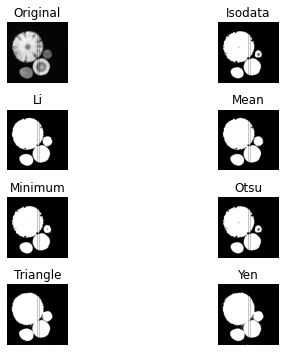

In [65]:
from skimage.filters import try_all_threshold

fig, ax = try_all_threshold(T1W_vox[:,:,12,1], verbose=False);

In [106]:
T1W_vox[160,135,10,:]

array([10876., 21226., 20141., 16955.])

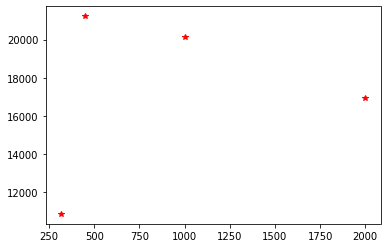

In [107]:
plt.plot(TR, T1W_vox[160,135,10,:], 'r*')

In [120]:
def funcT2mapping(x, a, b):
    return a * np.exp(x/b)

In [ ]:
def funcT1mapping(x, a, b):
    return a * np.exp(x/b)

In [140]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(funcT2mapping, TR, T2W_vox[160,135,10,:],bounds=([0,25],[26000,1500]),method='trf')

In [141]:
popt

array([1697.64146781, 1500.        ])

In [142]:
func(TE, *popt)

array([1755.18321807, 1814.67535248, 1876.18397955, 1939.77744851])

In [143]:
T2W_vox[160,135,10,:]

array([11229.,  5975.,  3446.,  2086.])

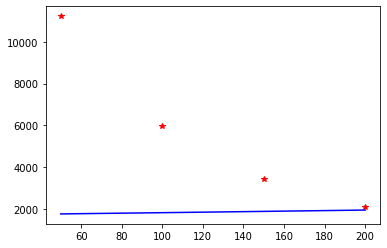

In [144]:
plt.plot(TE, T2W_vox[160,135,10,:], 'r*')
plt.plot(TE, func(TE, *popt), 'b-')
plt.show()

In [135]:
 T2W_vox[160,135,10,:]/1000

array([11.229,  5.975,  3.446,  2.086])